# Historical Intraday Analysis


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import dukascopy_python as fx
from dukascopy_python.instruments import INSTRUMENT_FX_CROSSES_USD_MXN as USDMXN

from live_fx_features import compute_features, fit_stoikov_expected_move
plt.style.use("seaborn-v0_8")


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.7' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arrays/masked.py:56: UserWarning: Pandas requires version '1.4.2' or newer of 'bottleneck' (version '1.3.7' currently installed).
  from pandas.core import (


In [2]:
start = dt.datetime(2026, 1, 26)
end = dt.datetime(2026, 1, 30)
instrument = USDMXN
interval = fx.INTERVAL_TICK
offer_side = fx.OFFER_SIDE_BID

quotes = fx.fetch(
    instrument,
    interval,
    offer_side,
    start,
    end,
).rename(columns = {'askPrice': 'ask', 'bidPrice': 'bid', 'askVolume': 'ask_volume', 'bidVolume': 'bid_volume'})
quotes.head()


INFO:DUKASCRIPT:current timestamp :2026-01-26T04:28:12.009000
INFO:DUKASCRIPT:current timestamp :2026-01-26T08:10:23.293000
INFO:DUKASCRIPT:current timestamp :2026-01-26T11:58:54.345000
INFO:DUKASCRIPT:current timestamp :2026-01-26T17:39:43.789000
INFO:DUKASCRIPT:current timestamp :2026-01-27T00:09:13.917000
INFO:DUKASCRIPT:current timestamp :2026-01-27T04:44:47.912000
INFO:DUKASCRIPT:current timestamp :2026-01-27T07:28:48.682000
INFO:DUKASCRIPT:current timestamp :2026-01-27T11:33:28.091000
INFO:DUKASCRIPT:current timestamp :2026-01-27T16:47:01.917000
INFO:DUKASCRIPT:current timestamp :2026-01-27T19:40:21.728000
INFO:DUKASCRIPT:current timestamp :2026-01-28T00:13:56.443000
INFO:DUKASCRIPT:current timestamp :2026-01-28T04:45:07.468000
INFO:DUKASCRIPT:current timestamp :2026-01-28T07:24:10.332000
INFO:DUKASCRIPT:current timestamp :2026-01-28T09:58:53.515000
INFO:DUKASCRIPT:current timestamp :2026-01-28T12:56:18.790000
INFO:DUKASCRIPT:current timestamp :2026-01-28T18:29:00.699000
INFO:DUK

,bid,ask,bid_volume,ask_volume
timestamp,,,,
2026-01-26 08:00:00.071000+00:00,17.38769,17.39195,1.20,1.8
2026-01-26 08:00:00.122000+00:00,17.38701,17.39047,1.35,1.2
2026-01-26 08:00:00.182000+00:00,17.38655,17.39018,1.20,1.2
2026-01-26 08:00:00.241000+00:00,17.38647,17.39105,1.20,1.8
2026-01-26 08:00:00.292000+00:00,17.38647,17.39105,1.20,1.5


In [3]:

# Compute feature set (micro-price, spreads, returns, vol, imbalance, etc.)
lookup = fit_stoikov_expected_move(quotes, horizon=1, n_bins=6)
features = compute_features(quotes, stoikov_table=lookup, stoikov_horizon=1)
features.tail()


,mid,micro_price,micro_price_stoikov,spread,spread_bps,ret_1s,rv_10s,jump_flag,ret_10s,ret_10s_z,...,ret_120s,ret_120s_z,spread_z_120s,rv_120s,range_120s,slope_120s,imbalance,imbalance_z,spread_wide_flag,mid_gaps
timestamp,,,,,,,,,,,,,,,,,,,,,
2026-01-30 07:59:59.106000+00:00,17.265170,17.264998,17.265146,0.00538,3.116100,8.688050e-06,1.871960e-10,False,0.000002,-1.177723,...,0.000550,2.263644,2.322898,5.120914e-08,0.009590,0.000099,-0.063830,-0.851172,False,False
2026-01-30 07:59:59.207000+00:00,17.265235,17.265067,17.265211,0.00525,3.040793,3.764798e-06,1.643834e-10,False,0.000012,-0.904598,...,0.000554,2.257970,2.061863,5.122323e-08,0.009655,0.000099,-0.063830,-0.721370,False,False
2026-01-30 07:59:59.359000+00:00,17.265220,17.265048,17.265196,0.00538,3.116091,-8.687983e-07,1.462676e-10,False,0.000006,-1.018480,...,0.000552,2.234167,2.198521,5.122390e-08,0.009655,0.000099,-0.063830,-0.721370,False,False
2026-01-30 07:59:59.663000+00:00,17.265130,17.264958,17.265106,0.00538,3.116107,-5.212806e-06,1.704216e-10,False,0.000003,-1.084473,...,0.000550,2.206866,2.136548,5.124268e-08,0.009655,0.000098,-0.063830,-0.573895,False,False
2026-01-30 07:59:59.817000+00:00,17.265090,17.265420,17.265145,0.00538,3.116115,-2.316811e-06,1.637121e-10,False,-0.000003,-1.234856,...,0.000545,2.169069,2.079362,5.123965e-08,0.009655,0.000098,0.122807,1.037235,False,False


In [4]:

# Example lightweight signal/guardrails
sig = pd.DataFrame(index=features.index)

# 1) Trend bias: use 30s return z-score
sig["trend_bias"] = np.where(features["ret_30s_z"] > 1.5, 1,
                      np.where(features["ret_30s_z"] < -1.5, -1, 0))

# 2) Volatility / stress exits
sig["jump_exit"] = features["jump_flag"] | features["spread_wide_flag"]

# 3) Liquidity-aware sizing: inverse of recent spread z-score (clipped)
sig["liq_size_factor"] = (1 / (1 + features["spread_z_10s"].abs())).clip(0.25, 2.0)

sig.tail()


,trend_bias,jump_exit,liq_size_factor
timestamp,,,
2026-01-30 07:59:59.106000+00:00,0,False,0.470312
2026-01-30 07:59:59.207000+00:00,0,False,0.749094
2026-01-30 07:59:59.359000+00:00,0,False,0.472482
2026-01-30 07:59:59.663000+00:00,0,False,0.472482
2026-01-30 07:59:59.817000+00:00,0,False,0.517789


TypeError: Axes.fill_between() missing 1 required positional argument: 'y1'

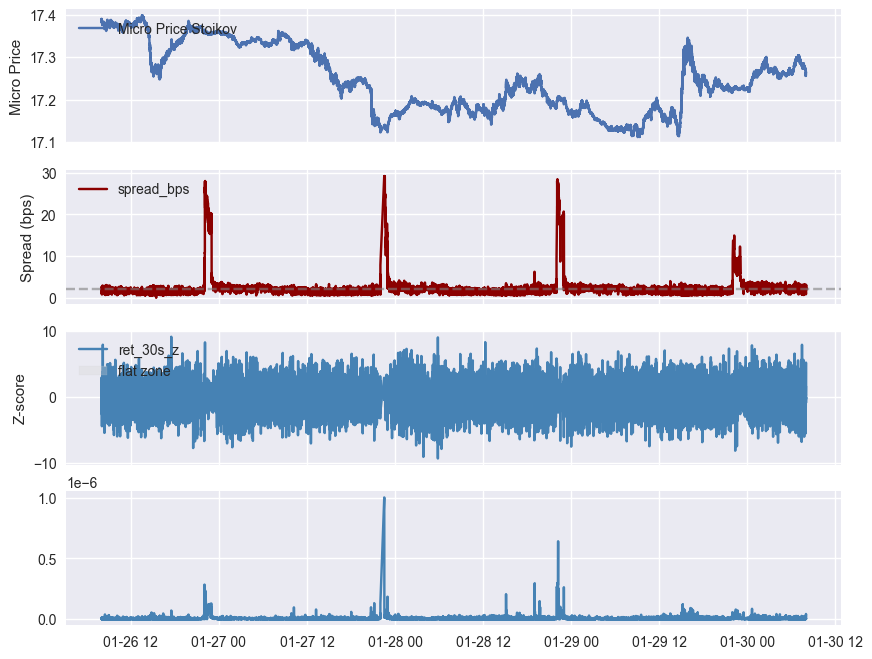

In [5]:

# Quick visualization
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(features.index, features["micro_price_stoikov"], label="Micro Price Stoikov")
axes[0].set_ylabel("Micro Price")
axes[0].legend(loc="upper left")

axes[1].plot(features.index, features["spread_bps"], label="spread_bps", color="darkred")
axes[1].axhline(features["spread_bps"].mean(), color="gray", ls="--", alpha=0.6)
axes[1].set_ylabel("Spread (bps)")
axes[1].legend(loc="upper left")

axes[2].plot(features.index, features["ret_30s_z"], label="ret_30s_z", color="steelblue")
axes[2].fill_between(features.index, -1.5, 1.5, color="lightgray", alpha=0.3, label="flat zone")
axes[2].set_ylabel("Z-score")
axes[2].legend(loc="upper left")

axes[3].plot(features.index, features["rv_30s"], label="rv_30s", color="steelblue")
axes[3].fill_between(features.index, color="lightgray", alpha=0.3, label="flat zone")
axes[3].set_ylabel("RV")
axes[3].legend(loc="upper left")

plt.tight_layout()
plt.show()


In [ ]:

# Tick log returns (use bid/ask mid from features)
tick_rets = np.log(features["mid"]).diff()

# Jump-robust measures on a 300-tick window (~5 minutes of 1s data)
from live_fx_features import rolling_jump_test, volatility_signature, two_scale_rv, median_realized_vol

jump_df = rolling_jump_test(tick_rets, window=300)
jump_df.tail()


In [ ]:

# Volatility signature plot (noise floor diagnostic)
sig = volatility_signature(features["mid"], max_step=20)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(sig.index, sig["rv"], marker="o")
ax.set_xlabel("Sampling step (ticks)")
ax.set_ylabel("Realized variance")
ax.set_title("Volatility signature (lower slope -> less microstructure noise)")
plt.show()


In [ ]:

ts_rv = two_scale_rv(features["mid"], K=3)
med_rv_series = median_realized_vol(tick_rets, window=300)
print(f"Two-scale RV (full sample): {ts_rv:.2e}")
print(f"Median RV (latest window): {med_rv_series.dropna().iloc[-1]:.2e}")


In [ ]:
features[['rv_30s']].iloc[-10_000:].plot()